In [1]:
# Importing pandas pack to impot the data:

import pandas as pd

# Storing the difeent files in variables

ted = pd.read_csv("ted.csv")
ratings = pd.read_csv("ratings.csv")
talk_ratings = pd.read_csv("talk_ratings.csv")
ted_tags = pd.read_csv("ted_tags.csv")

In [2]:
# Let´s chack for missing values in the main data (ted):

ted.isnull().sum()

Unnamed: 0            0
comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
speaker_occupation    6
title                 0
url                   0
views                 0
dtype: int64

In [3]:
# Just finding 6 missing values in the speaker occupation, the data is quite clean.

In [4]:
# First of all, let´s change the film_date and published_date columns in ted datato redale data to be able 
# to work with them later on.
# Impoting datatime to do this stage:

import datetime
ted['film_date'] = ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
ted['published_date'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [5]:
# Checking ted:

ted.head()

,Unnamed: 0,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,speaker_occupation,title,url,views
0,1,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,2,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,3,124,New York Times columnist David Pogue takes aim...,1286,TED2006,24-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,27-06-2006,Technology columnist,Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,4,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,26-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,27-06-2006,Activist for environmental justice,Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,5,593,You've never seen data presented like this. Wi...,1190,TED2006,22-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,Global health expert; data visionary,The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [6]:
# Checking ratings:

ratings.head()

,id,rating
0,1,Beautiful
1,2,Confusing
2,3,Courageous
3,7,Funny
4,8,Informative


In [7]:
# Checking talk_ratings:

talk_ratings.head()

,id,title,count
0,7,Do schools kill creativity?,19645
1,1,Do schools kill creativity?,4573
2,9,Do schools kill creativity?,6073
3,3,Do schools kill creativity?,3253
4,11,Do schools kill creativity?,387


In [8]:
# Checking ted_tags:

ted_tags.head()

,Unnamed: 0,title,tags
0,1,Do schools kill creativity?,children
1,2,Do schools kill creativity?,creativity
2,3,Do schools kill creativity?,culture
3,4,Do schools kill creativity?,dance
4,5,Do schools kill creativity?,education


In [9]:
# First of all, lets check for the number of views of the ted talks:

# Let´s check for some statistics of views:

ted["views"].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

well, we can see that the maximum number of views is 47000000 and the rest of the views are below. the mean of views 
is 1.6 million and the median 1.12 million, so 

c:\users\usuario\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views', ylabel='Density'>

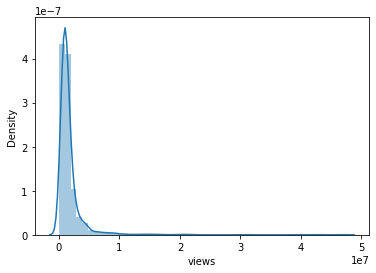

In [10]:
# Let´s import seaborn to makes graphs:

import seaborn as sns

# Let´s plot to visualize the views:

sns.distplot(ted["views"])

c:\users\usuario\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views', ylabel='Density'>

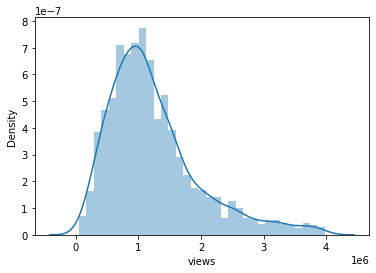

In [11]:
# Let´s visualize the views specifying the number of views less than 4 millions as most of the views are less than
# this figure:

sns.distplot(ted[ted["views"]<4000000]["views"])

In [12]:
# Let´s Check who are the talks with more views:

most_views = ted[["name","views"]].sort_values(by=["views"],ascending = False)
most_views[:20]

,name,views
0,Ken Robinson: Do schools kill creativity?,47227110
1346,Amy Cuddy: Your body language may shape who yo...,43155405
677,Simon Sinek: How great leaders inspire action,34309432
837,Brené Brown: The power of vulnerability,31168150
452,Mary Roach: 10 things you didn't know about or...,22270883
1776,Julian Treasure: How to speak so that people w...,21594632
201,Jill Bolte Taylor: My stroke of insight,21190883
5,Tony Robbins: Why we do what we do,20685401
2114,James Veitch: This is what happens when you re...,20475972
1416,Cameron Russell: Looks aren't everything. Beli...,19787465


In [13]:
# Now, let´s analyse the "languages":

ted["languages"].describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

In [14]:
# I am going to count the number of talks traslate into certain number of languages:

languages_count = ted["languages"].value_counts()
languages_count

26    152
29    144
28    138
27    133
30    130
     ... 
65      1
55      1
59      1
61      1
72      1
Name: languages, Length: 66, dtype: int64

<AxesSubplot:>

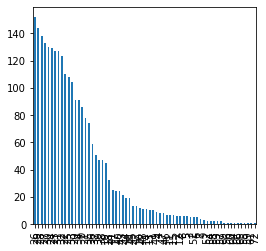

In [15]:
# Lets visualize this calculation of count of languages in a bar plot:

languages_count.plot(kind = "bar", xlim = (0,160), fontsize = 10, figsize = (4,4))

c:\users\usuario\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


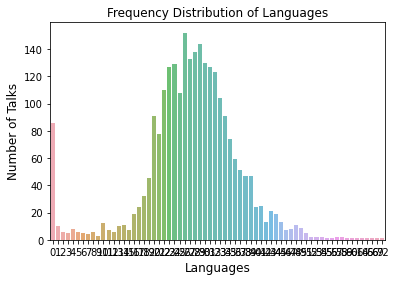

In [16]:
# Let´s make another graph to visualize its distribution:

import matplotlib.pyplot as plt

languages_views = ted[["languages", "views"]]

number_counts = languages_views["languages"].value_counts()
sns.barplot(number_counts.index, number_counts.values, alpha=0.8)
plt.title('Frequency Distribution of Languages')
plt.ylabel('Number of Talks', fontsize=12)
plt.xlabel('Languages', fontsize=12)
plt.show()

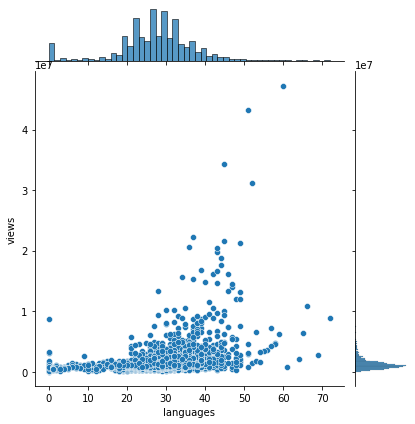

In [17]:
# Let´s to visualize the relationship between languages and views with a scatterplot:

sns.jointplot(x="languages", y="views", data = languages_views)
plt.show()

Acoording to the data, 
We see that the average number of languages to which the talks are translated is 27.3. We can see that most of the talks can 
be seen between 23 and 33 languages. We also see that there is a slight positive correlation.

In [18]:
# Let´s calculate the correlation between the languages and the number of visualitations:

languages_views.corr()

,languages,views
languages,1.000000,0.377623
views,0.377623,1.000000


In [19]:
# Let´s calculate the correlation just considering those talks traslated into more than 20 languages:

morethan20 = languages_views[languages_views["languages"] > 20]
morethan20.corr()

,languages,views
languages,1.000000,0.418237
views,0.418237,1.000000


In [20]:
# Let´s now to analysis the duration of the talks:

# Firstly, I am going to convert all the cariable to minutes:

ted["duration"] = ted["duration"]/60


In [21]:
# Now, let´s calculate some statistics of the duration:
ted["duration"].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

In [22]:
# Now, let´s calculate on average how long are the talks:

talks_duration_avg = ted["duration"].mean()
talks_duration_avg

13.775169934640523

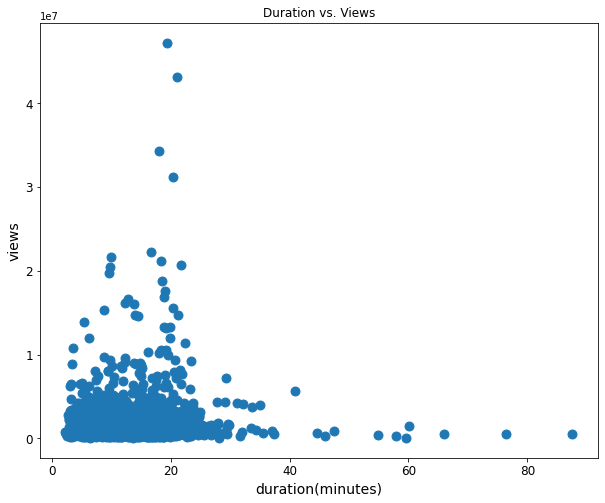

In [23]:
# Lets use a scatterplot to visualize this relatonship:
# Lets import matplotlib

import matplotlib.pyplot as plt 
%matplotlib inline

p = ted.plot.scatter("duration","views", s=80, figsize=(10,8), fontsize=12)
plt.xlabel('duration(minutes)', fontsize=14)
plt.ylabel('views', fontsize=14)
plt.title("Duration vs. Views");

In [24]:
# Let´s calculate the correlation between both duration and visualitation:

duration_views = ted[["duration", "views"]]

duration_views.corr()

,duration,views
duration,1.00000,0.04874
views,0.04874,1.00000



We can see after this analysis that the average duration is 13 minutes, and that most of the talks last between 9 and 17 minutes,
and the correlation coefficient suggests that there is a positive correlation between the duration of the talks and the visualizations 

In [25]:
# Let´s now to analysis those motnhs where the talks are whach the most:
# First off all, lets organize the months:

month_orden = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ted['month'] = ted['film_date'].apply(lambda x: month_orden[int(x.split('-')[1]) - 1])

In [26]:
# Let´s create a new dataframe with the months and the talks:

month_data = pd.DataFrame(ted['month'].value_counts()).reset_index()

# Creating the columns:

month_data.columns = ['month', 'talks']

<AxesSubplot:xlabel='month', ylabel='talks'>

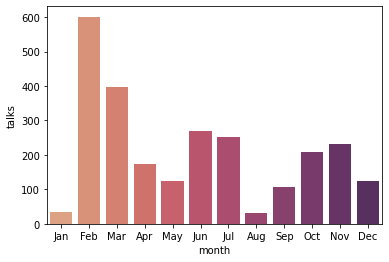

In [27]:
sns.barplot(x='month', y='talks', data=month_data, order=month_orden, palette='flare')

It seems that the months with the most views are mostly February together with March, then June and July and then October and November. Without a doubt, the months in which people see the least talks are January and August. Therefore, it would be interesting to consider the months with the most views and discard the worst.

In [28]:
# Let´s now to analysis the events:

events = ted.groupby('event').sum()

# Here, organizing for numer of views:

events_orden = events.sort_values(by=['views'],ascending=False)

# let´s get those with more than 30000000 views

events_orden = events_orden[events_orden["views"] > 30000000]

# I reduce the figures to wotk easier:

events_orden["views"] = events_orden["views"] /1000000

# Let´s see which are those events: 

events_orden["views"]



event
TED2013                177.307937
TED2014                174.121423
TEDGlobal 2013         170.554736
TED2015                150.826305
TED2006                147.345533
TED2009                145.656385
TEDGlobal 2012         145.070549
TED2012                144.497608
TED2016                139.571905
TED2011                137.750504
TED2010                122.268845
TEDGlobal 2011         116.807745
TED2008                116.202871
TEDGlobal 2009         109.136352
TED2007                102.756885
TED2004                 83.502957
TED2017                 79.613259
TEDGlobal 2010          73.640042
TEDGlobal 2014          67.124493
TED2005                 66.088906
TEDSummit               52.018727
TEDxBeaconStreet        48.564891
TEDIndia 2009           47.567971
TEDWomen 2010           44.134937
TEDGlobal 2005          42.615627
TEDWomen 2015           40.597242
TEDxMidAtlantic         39.195275
TED2003                 37.780871
TEDGlobal>Geneva        37.239487
TED Talk

Text(0.5, 1.0, 'Most Watched Events')

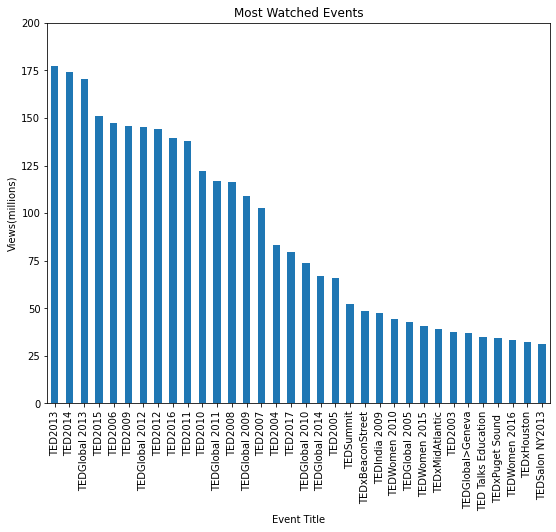

In [29]:
# Let´s create a barplot to visualize them:

p = events_orden["views"].plot.bar(figsize=(9, 7))

p.set_ylim((0,200))
p.set_xlabel("Event Title")
p.set_ylabel("Views(millions)")
p.set_title("Most Watched Events")

In [39]:
# let´s check the number of talks per year:

ted['year'] = ted['film_date'].apply(lambda x: x.split('-')[2])
year_check = pd.DataFrame(ted['year'].value_counts().reset_index())
year_check.columns = ['year', 'num_teds']

# Now let´s sort the years:

year_teds = year_df.sort_values(by=['year'])

# Let´s check it:

year_teds.head()

,year,num_teds
18,1972,1
22,1983,1
21,1984,1
19,1990,1
23,1991,1


<AxesSubplot:xlabel='year', ylabel='num_teds'>

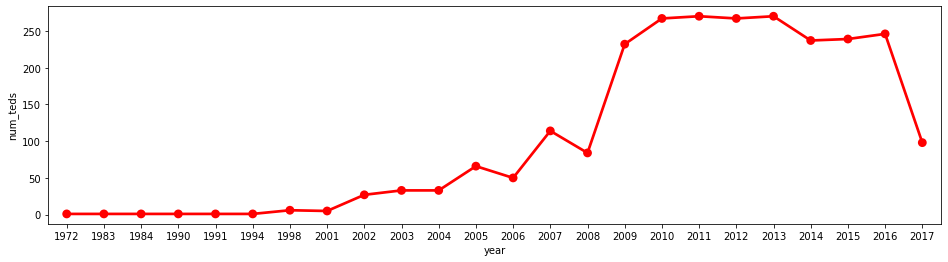

In [41]:
# Let´s now to visualize how changed the number of talks over the time years:

plt.figure(figsize = (16,4))
sns.pointplot(x='year', y='num_teds', data=year_teds, color='red')

In [30]:
# Now I am going to analying who were the most popular speakers:

speakers_popular = ted.groupby('main_speaker').count().reset_index()[["main_speaker","num_speaker"]]
speakers_popular.columns=['main_speaker','num_times']
speakers_popular = speakers_popular.sort_values('num_times', ascending = False)
speakers_popular.head(15)

,main_speaker,num_times
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


It is interesting to see who are the speakers that have caried out more talks so far, considerig them.

In [31]:
occupation_most = ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation','num_speaker']]
occupation_most.columns = ['occupation','num_times']
occupation_most= occupation_most.sort_values('num_times', ascending = False)
occupation_most.head(10)

,occupation,num_times
1426,Writer,45
83,Artist,34
413,Designer,34
753,Journalist,33
515,Entrepreneur,31
71,Architect,30
733,Inventor,27
1131,Psychologist,26
1011,Photographer,25
567,Filmmaker,21


<AxesSubplot:xlabel='occupation', ylabel='num_times'>

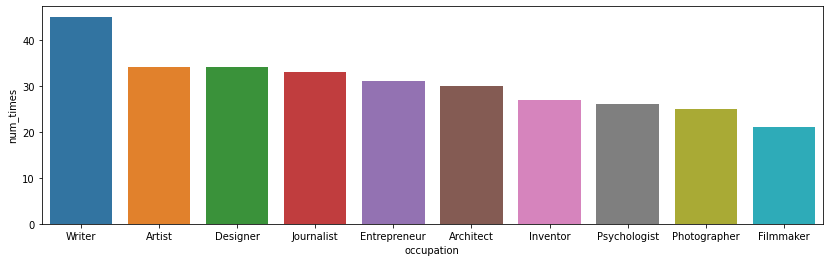

In [32]:
plt.figure(figsize=(14,4))
sns.barplot(x = 'occupation', y = 'num_times', data = occupation_most.head(10))

I would suggest to take into account all the main acupations showed in the plot above, so bear in main that the speaker
belongs to some of these acupations.

In [33]:
# Let´s calculate the most populat tags now:

union = pd.merge(ted, ted_tags, on='title')   


In [34]:
# Let´s calculate the most populat tags now:

populartags = pd.DataFrame(union['tags'].value_counts()).reset_index()
populartags.columns = ['tags', 'talks']
populartags.head(15)

,tags,talks
0,technology,727
1,science,567
2,globalissues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


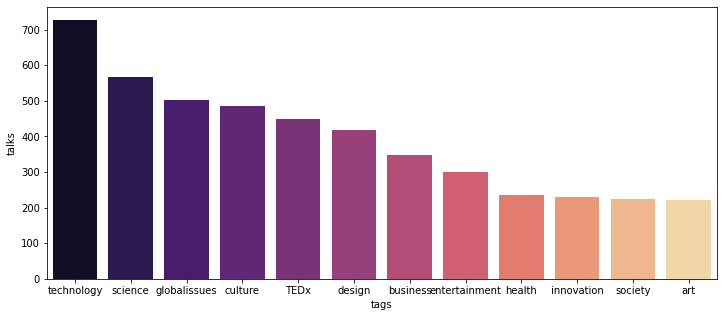

In [35]:
# Let´s plot it:

plt.figure(figsize=(12,5))
sns.barplot(x='tags', y='talks',palette="magma", data = populartags.head(12))
plt.show()

It would be advisale to consider all the talks that deal with these topics: technology, science, globalissues, culture, etc.

In [36]:
talk_ratings2 = talk_ratings.merge(ratings[['id', 'rating']], on=['id'])
talk_ratings2

,id,title,count,rating
0,7,Do schools kill creativity?,19645,Funny
1,7,Averting the climate crisis,544,Funny
2,7,Simplicity sells,964,Funny
3,7,Greening the ghetto,59,Funny
4,7,The best stats you've ever seen,1390,Funny
...,...,...,...,...
35695,10,What we're missing in the debate about immigra...,27,Inspiring
35696,10,The most Martian place on Earth,20,Inspiring
35697,10,What intelligent machines can learn from a sch...,30,Inspiring
35698,10,A black man goes undercover in the alt-right,147,Inspiring


In [43]:
rating_order = talk_ratings2.groupby('rating')['count'].sum()
rating_order.sort_values(ascending=False)

rating
Inspiring       1352048
Informative      887434
Fascinating      801119
Persuasive       561220
Beautiful        490349
Courageous       420045
Funny            393895
Ingenious        384386
Jaw-dropping     377547
OK               207157
Unconvincing     134558
Longwinded        83344
Obnoxious         66303
Confusing         53436
Name: count, dtype: int64